## Import Libraries

In [2]:
# Data Preproccessing
import numpy as np
import pandas as pd
# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# SkitLearn Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Goal: Predict Diamonds Price using features like: carat, depth, table, ...

### Read Dataset

- place dataset as csv file in root directory

In [3]:
#importing dataset using panda
data_diamonds = pd.read_csv('./diamonds.csv')
#to see what my dataset is comprised of
data_diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

- dimension of dataset

In [4]:
#dimension of dataset
data_diamonds.shape

(53940, 11)

In [5]:
#checking for categorical data
data_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


- show dataset with it's features

In [6]:
# show dataset
data_diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [7]:
# create a copy of dataset
df = data_diamonds.copy()
# Convert Object-type features to Category-type features
df[['cut']] = df[['cut']].astype('category')
df[['color']] = df[['color']].astype('category')
df.dtypes
df = pd.get_dummies(df, columns=['cut', 'clarity', 'color'], dtype=np.float64)
df

Unnamed: 0  carat  depth  table  price     x     y     z  cut_Fair  \
0               1   0.23   61.5   55.0    326  3.95  3.98  2.43       0.0   
1               2   0.21   59.8   61.0    326  3.89  3.84  2.31       0.0   
2               3   0.23   56.9   65.0    327  4.05  4.07  2.31       0.0   
3               4   0.29   62.4   58.0    334  4.20  4.23  2.63       0.0   
4               5   0.31   63.3   58.0    335  4.34  4.35  2.75       0.0   
...           ...    ...    ...    ...    ...   ...   ...   ...       ...   
53935       53936   0.72   60.8   57.0   2757  5.75  5.76  3.50       0.0   
53936       53937   0.72   63.1   55.0   2757  5.69  5.75  3.61       0.0   
53937       53938   0.70   62.8   60.0   2757  5.66  5.68  3.56       0.0   
53938       53939   0.86   61.0   58.0   2757  6.15  6.12  3.74       0.0   
53939       53940   0.75   62.2   55.0   2757  5.83  5.87  3.64       0.0   

       cut_Good  ...  clarity_VS2  clarity_VVS1  clarity_VVS2  color_D  \
0           0.0  ...          0.0           0.0           0.0      0.0   
1           0.0  ...          0.0           0.0           0.0      0.0   
2           1.0  ...          0.0           0.0           0.0      0.0   
3           0.0  ...          1.0           0.0           0.0      0.0   
4           1.0  ...          0.0           0.0           0.0      0.0   
...         ...  ...          ...           ...           ...      ...   
53935       0.0  ...          0.0           0.0           0.0      1.0   
53936       1.0  ...          0.0           0.0           0.0      1.0   
53937       0.0  ...          0.0           0.0           0.0      1.0   
53938       0.0  ...          0.0           0.0           0.0      0.0   
53939       0.0  ...          0.0           0.0           0.0      1.0   

       color_E  color_F  color_G  color_H  color_I  color_J  
0          1.0      0.0      0.0      0.0      0.0      0.0  
1          1.0      0.0      0.0      0.0      0.0      0.0  
2          1.0      0.0      0.0      0.0      0.0      0.0  
3          0.0      0.0      0.0      0.0      1.0      0.0  
4          0.0      0.0      0.0      0.0      0.0      1.0  
...        ...      ...      ...      ...      ...      ...  
53935      0.0      0.0      0.0      0.0      0.0      0.0  
53936      0.0      0.0      0.0      0.0      0.0      0.0  
53937      0.0      0.0      0.0      0.0      0.0      0.0  
53938      0.0      0.0      0.0      1.0      0.0      0.0  
53939      0.0      0.0      0.0      0.0      0.0      0.0  

[53940 rows x 28 columns]

In [8]:
# Dimension after data preproccessing
df.shape

(53940, 28)

## data distribution of price feature

C:\Users\M0jtabav1\AppData\Local\Temp\ipykernel_5496\2348761767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


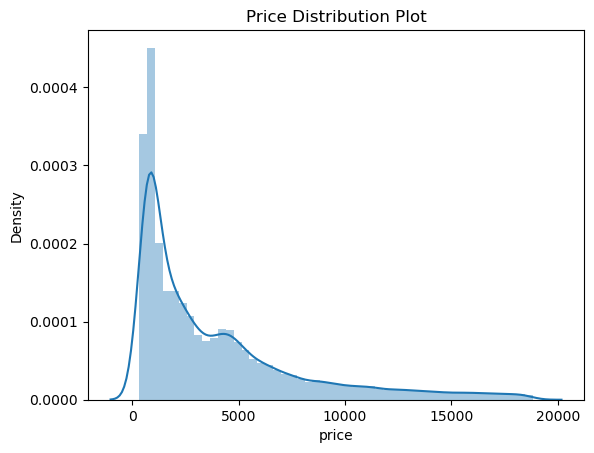

In [9]:
# Data distribution
plt.title('Price Distribution Plot')
sns.distplot(df['price'])
plt.show()

## Heatmap

<Axes: >

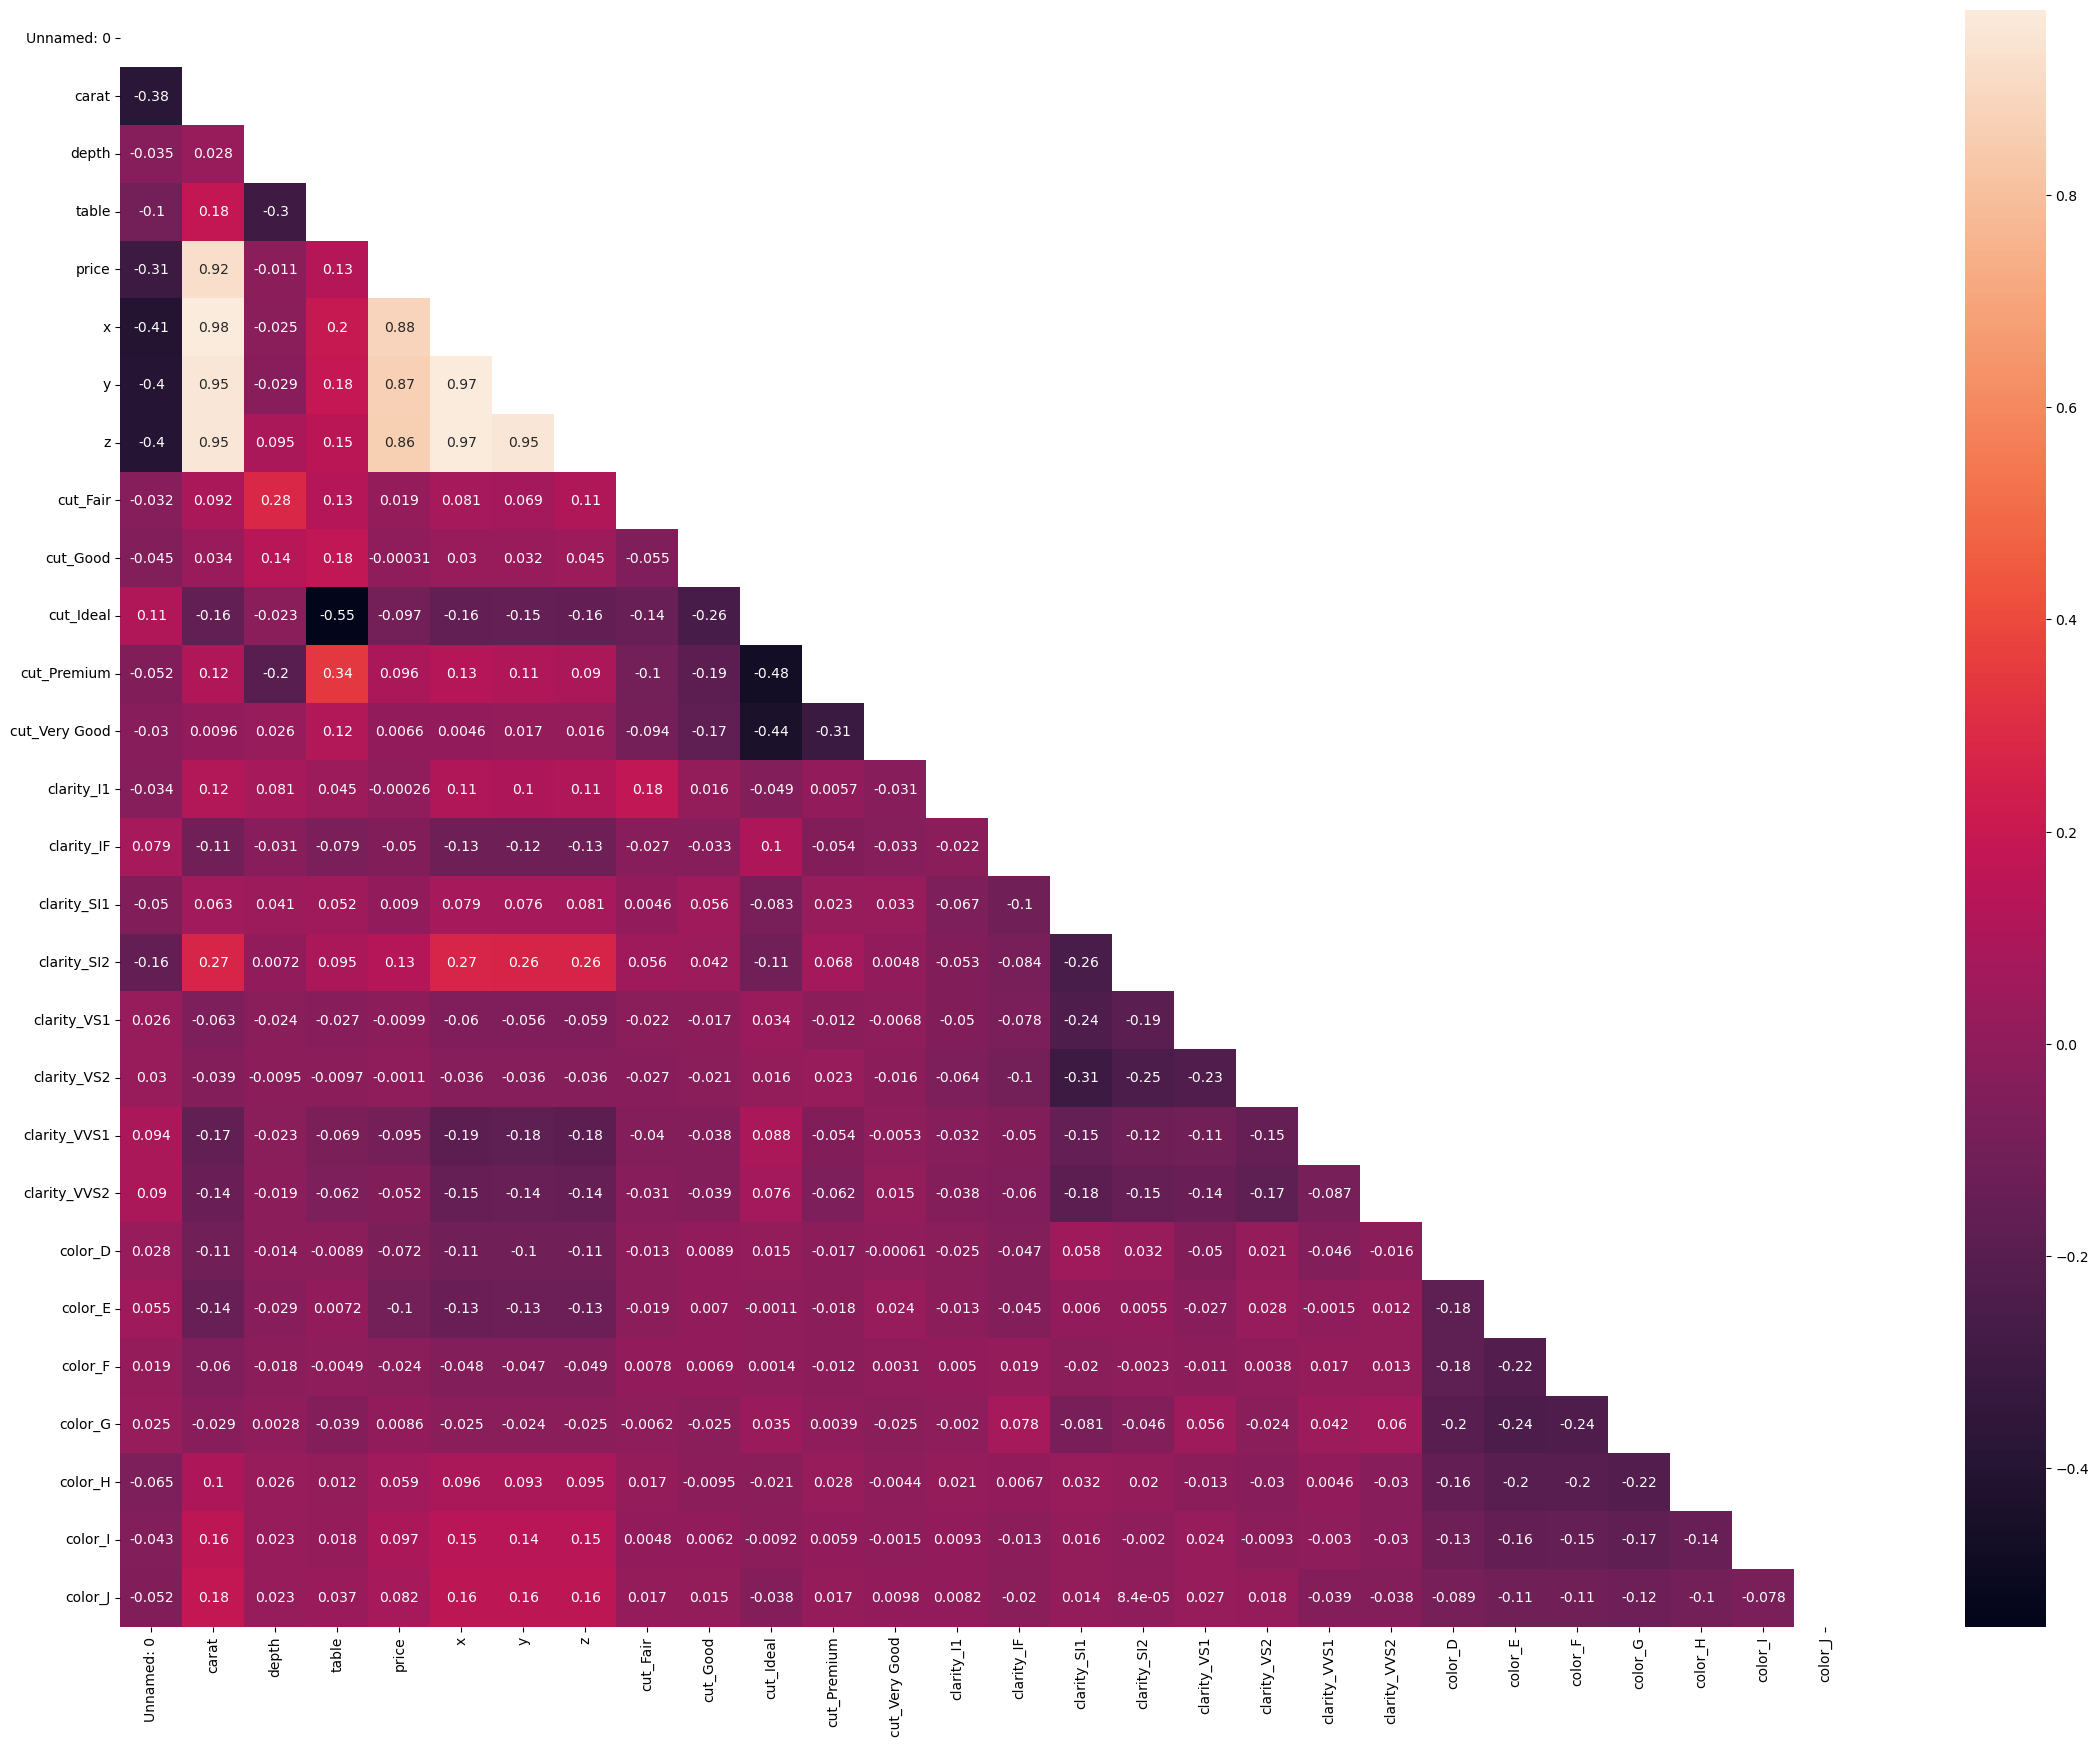

In [9]:
plt.figure(figsize=(28, 21))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))

## understanding the distribution

### X='carat' Y='price'

C:\Users\M0jtabav1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


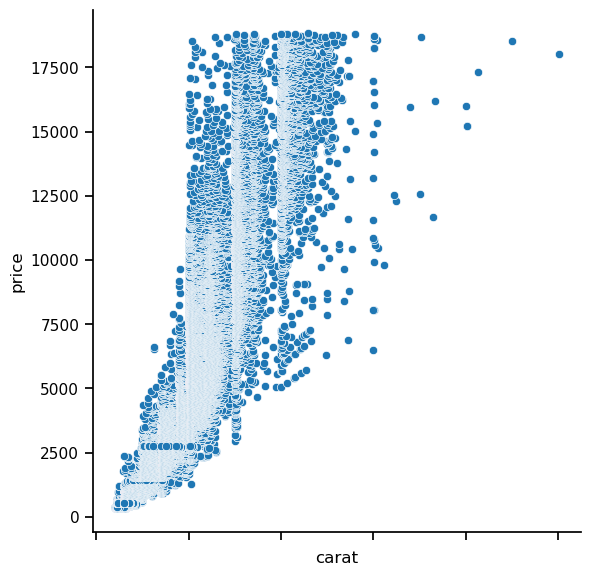

In [10]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=1):
    g = sns.pairplot(df, x_vars=['carat'] , y_vars='price',height=6)
g.set(xticklabels=[]);

# feature selection 

In [11]:
# Update problem from multivariate to univariate 
x = df['carat']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()

29477    0.32
52542    0.72
8725     0.38
15577    1.00
19651    1.70
Name: carat, dtype: float64

In [13]:
y_train.head()

29477     702
52542    2532
8725      586
15577    6249
19651    8263
Name: price, dtype: int64

# Linear and Polynomial Regression

In [14]:
# Train linear regression model on whole dataset
OrderedID   = np.argsort(X_train)
x = np.array(X_train)[OrderedID]
y = np.array(y_train)[OrderedID]

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

poly2d = PolynomialFeatures(degree=2, include_bias=False)
poly3d = PolynomialFeatures(degree=3, include_bias=False)
poly4d = PolynomialFeatures(degree=4, include_bias=False)
poly5d = PolynomialFeatures(degree=5, include_bias=False)
poly10d = PolynomialFeatures(degree=10, include_bias=False)
poly20d = PolynomialFeatures(degree=20, include_bias=False)

poly2d_features = poly2d.fit_transform(x.reshape(-1, 1))
poly3d_features = poly3d.fit_transform(x.reshape(-1, 1))
poly4d_features = poly4d.fit_transform(x.reshape(-1, 1))
poly5d_features = poly5d.fit_transform(x.reshape(-1, 1))
poly10d_features = poly10d.fit_transform(x.reshape(-1, 1))
poly20d_features = poly20d.fit_transform(x.reshape(-1, 1))

# Train polynomial regression model on the whole dataset
lr_2d = LinearRegression()
lr_2d.fit(poly2d_features, y)
print(lr_2d.intercept_, lr_2d.coef_)

lr_3d = LinearRegression()
lr_3d.fit(poly3d_features, y)
print(lr_3d.intercept_, lr_3d.coef_)

lr_4d = LinearRegression()
lr_4d.fit(poly4d_features, y)
print(lr_4d.intercept_, lr_4d.coef_)

lr_5d = LinearRegression()
lr_5d.fit(poly5d_features, y)
print(lr_5d.intercept_, lr_5d.coef_)

lr_10d = LinearRegression()
lr_10d.fit(poly10d_features, y)
print(lr_10d.intercept_, lr_10d.coef_)

lr_20d = LinearRegression()
lr_20d.fit(poly20d_features, y)
print(lr_20d.intercept_, lr_20d.coef_)

-1858.2299746642802 [6744.65950996  483.04804444]
-285.7494541699689 [ 1151.3033765   5477.85634953 -1213.1223623 ]
1495.2887398807788 [-6615.77241888 15116.19429447 -5455.62385131   567.38433108]
1022.8382499385916 [-4148.13314441 11014.06510471 -2623.76594546  -263.36279644
    83.23622395]
-1995.7577380268858 [ 2.27300887e+04 -8.68518966e+04  1.91893235e+05 -2.33747876e+05
  1.76167174e+05 -8.44181684e+04  2.55016501e+04 -4.67944323e+03
  4.75107935e+02 -2.04450279e+01]
1329.2642288535344 [-1.24314440e+04  5.33407635e+04 -7.12534662e+04  2.61956036e+03
  6.72053713e+04  7.32290709e+03 -6.47745391e+04 -2.74611056e+04
  5.92114211e+04  3.76408382e+04 -6.35994125e+04 -2.20740008e+04
  8.34921936e+04 -7.02102626e+04  3.27726014e+04 -9.70686904e+03
  1.87481297e+03 -2.29946188e+02  1.63155159e+01 -5.11077160e-01]


In [15]:
y_hat = lr_5d.predict(poly5d_features)
loss_train = mean_squared_error(y, y_hat)
print(loss_train)

2070490.4359489274


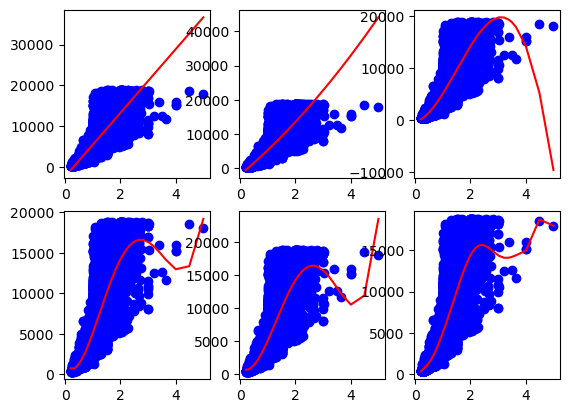

In [16]:
# Visualising the Linear Regression results

fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,0].plot(x.reshape(-1, 1), lr.predict(x.reshape(-1, 1)), color='red')
#ax[0,0].title('Linear Regression')
#ax[0,0].xlabel('Carat')
#ax[0,0].ylabel('Price')

ax[0,1].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,1].plot(x.reshape(-1, 1), lr_2d.predict(poly2d_features), color='red')
#ax[0,1].title('Polynomial Regression')
#ax[0,1].xlabel('Carat')
#ax[0,1].ylabel('Price')

ax[0,2].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,2].plot(x.reshape(-1, 1), lr_3d.predict(poly3d_features), color='red')

ax[1,0].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,0].plot(x.reshape(-1, 1), lr_4d.predict(poly4d_features), color='red')

ax[1,1].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,1].plot(x.reshape(-1, 1), lr_5d.predict(poly5d_features), color='red')

ax[1,2].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,2].plot(x.reshape(-1, 1), lr_10d.predict(poly10d_features), color='red')
 
plt.show()

## Polynomial Regression using SGDRegressor Method

In [17]:
x_set = np.array(df.drop(['price'], axis=1))
y_set = np.array(df['price'])

x_set_carat = np.array(df['carat'])
y_set_carat = np.array(df['price'])

x_set.shape, y_set.shape, x_set_carat.shape, y_set_carat.shape

((53940, 27), (53940,), (53940,), (53940,))

In [18]:
loss1_hist = []
score1_hist = []

loss2_hist = []
score2_hist = []

loss3_hist = []
score3_hist = []

In [19]:
loss_hist = [[], [], [], []]
score_hist = [[], [], [], []]

In [20]:
lr = 0.01
n_epochs = 2000
ds=[1, 2, 3, 4]
random_seed = 14
polynomials = []
models = []

for d in ds: 
    polynomial = PolynomialFeatures(degree=d)
    model = SGDRegressor(eta0=lr, random_state=random_seed)

    x_set_poly = polynomial.fit_transform(x_set_carat[:, None])

    for epoch in range(n_epochs):
        model.partial_fit(x_set_poly, y_set_carat.ravel())

        y_hat = model.predict(x_set_poly)
        loss_train = mean_absolute_error(y_set_carat, y_hat)
        loss_hist[(ds.index(d))].append(loss_train)

        score = r2_score(y_set_carat, y_hat)
        score_hist[(ds.index(d))].append(score)

        if (epoch+1) % 100 == 0 or epoch<10:
            print(f'd={d}, Epoch={epoch}, \t Loss={loss_train:.4},\t score={score:.4}')
    
    polynomials.append(polynomial)
    models.append(model)

    print()
    print()

d=1, Epoch=0, 	 Loss=1.014e+03,	 score=0.8489
d=1, Epoch=1, 	 Loss=1.013e+03,	 score=0.849
d=1, Epoch=2, 	 Loss=1.012e+03,	 score=0.849
d=1, Epoch=3, 	 Loss=1.012e+03,	 score=0.8491
d=1, Epoch=4, 	 Loss=1.011e+03,	 score=0.8491
d=1, Epoch=5, 	 Loss=1.011e+03,	 score=0.8491
d=1, Epoch=6, 	 Loss=1.011e+03,	 score=0.8491
d=1, Epoch=7, 	 Loss=1.011e+03,	 score=0.8491
d=1, Epoch=8, 	 Loss=1.011e+03,	 score=0.8492
d=1, Epoch=9, 	 Loss=1.01e+03,	 score=0.8492
d=1, Epoch=99, 	 Loss=1.009e+03,	 score=0.8493
d=1, Epoch=199, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=299, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=399, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=499, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=599, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=699, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=799, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=899, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=999, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=1099, 	 Loss=1.008e+03,	 score=0.8493
d=1, Epoch=1199

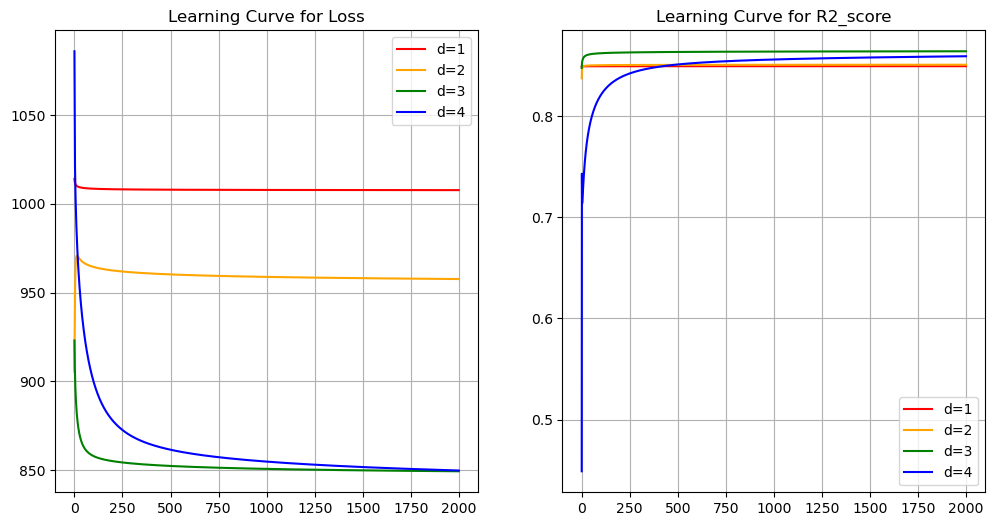

In [21]:
colors= ['r', 'orange', 'g', 'blue', 'cyan']
fig, ax =plt.subplots(1, 2, figsize=(12, 6))

for d in ds:
    ax[0].plot(loss_hist[ds.index(d)], color=colors[ds.index(d)], label=f'd={d}')
    ax[1].plot(score_hist[ds.index(d)], color=colors[ds.index(d)], label=f'd={d}')

ax[0].legend()
ax[0].grid()
ax[0].set_title('Learning Curve for Loss')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Learning Curve for R2_score');

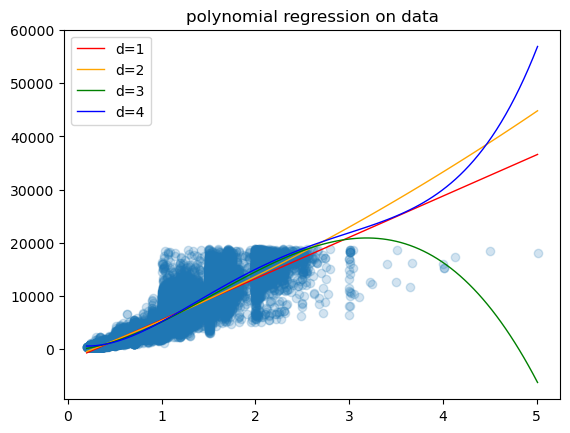

In [22]:
plt.scatter(x_set_carat, y_set_carat, alpha=0.2)
c= ['r', 'orange', 'g', 'blue']
for d in ds:
    x = np.linspace(x_set_carat.min(), x_set_carat.max(), 100)[:, None]
    xp = polynomials[ds.index(d)].transform(x)
    y_hat = models[ds.index(d)].predict(xp)
    plt.plot(x, y_hat, color=c[ds.index(d)],linewidth=1, label=f'd={d}')

plt.legend()
plt.title('polynomial regression on data');

# Kernel Regression

C:\Users\M0jtabav1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


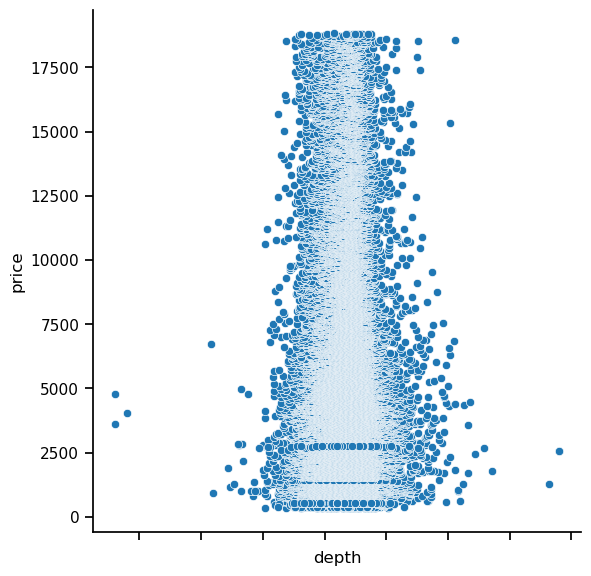

In [23]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=1):
    g = sns.pairplot(df, x_vars=['depth'] , y_vars='price',height=6)
g.set(xticklabels=[]);

In [24]:
# Update problem from multivariate to univariate 
x = df['depth']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.01, test_size = 0.99, random_state = 1000)

## Class for Gaussian Kernel Regression

In [25]:
#1-D normal Python
import math
import scipy.stats as stats

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/math.sqrt(2*math.pi))*math.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y)/len(self.x)
    
    def visualize_kernels(self, precision):
        plt.figure(figsize = (10,5))
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
        
        #plt.text(1, 1, 'Some text', transform=ax.transAxes)
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()
    
    def visualize_predictions(self, precision, X):
        plt.figure(figsize = (10,5))
        max_y = 0
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            max_y = max(max(y_normal), max_y)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        #plt.text(1, 1, 'Some text', transform=ax.transAxes)
        plt.plot([X,X], [0, max_y], 'k-', lw=1,dashes=[2, 2])
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()

In [26]:
gkr = GKR(X_train, y_train, 10)

In [27]:
%%time 
gkr.predict(58.0)

CPU times: total: 15.6 ms
Wall time: 14.1 ms


3965.4994756256096

CPU times: total: 406 ms
Wall time: 491 ms


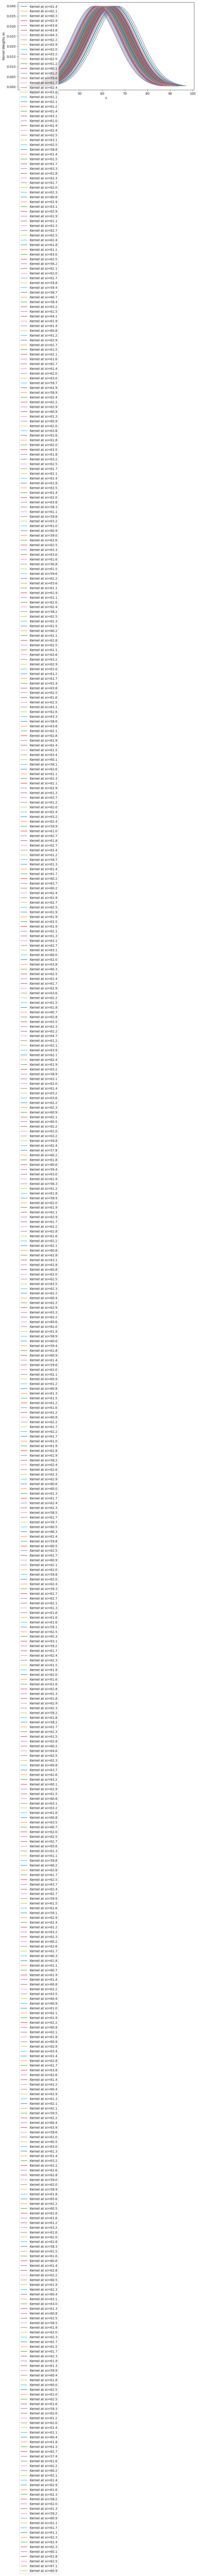

In [28]:
%%time 
gkr.visualize_kernels(100)

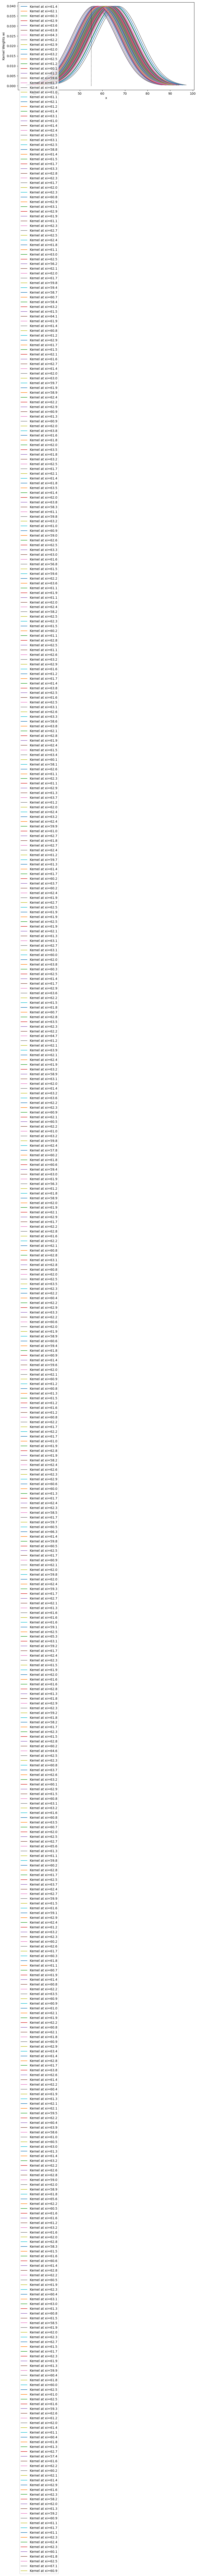

In [29]:
gkr.visualize_predictions(100,55)